<a href="https://colab.research.google.com/github/ItsLatikahere/Oasis/blob/T2_P2/L2_P2_WineQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Idea: Wine Quality Prediction

Description:
The focus is on predicting the quality of wine based on its chemical characteristics, offering a real-world application of machine learning in the context of viticulture. The dataset encompasses diverse chemical attributes, including density and acidity, which serve as the features for three distinct classifier models.


1. Importing libraries for Data analysis and Visualization

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbs

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

myfile_path = '/content/drive/MyDrive/WineQT.csv'
df = pd.read_csv(myfile_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
wq = pd.read_csv(myfile_path)
print(wq.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [ ]:
print(wq.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None


In [ ]:
print(wq.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000         

In [ ]:
print(wq.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


No missing values are present.

In [ ]:
wq.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.250728     0.673157   
volatile acidity          -0.250728          1.000000    -0.544187   
citric acid                0.673157         -0.544187     1.000000   
residual sugar             0.171831         -0.005751     0.175815   
chlorides                  0.107889          0.056336     0.245312   
free sulfur dioxide       -0.164831         -0.001962    -0.057589   
total sulfur dioxide      -0.110628          0.077748     0.036871   
density                    0.681501          0.016512     0.375243   
pH                        -0.685163          0.221492    -0.546339   
sulphates                  0.174592         -0.276079     0.331232   
alcohol                   -0.075055         -0.203909     0.106250   
quality                    0.121970         -0.407394     0.240821   
Id                        -0.275826         -0.007892    -0.139011   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.171831   0.107889            -0.164831   
volatile acidity           -0.005751   0.056336            -0.001962   
citric acid                 0.175815   0.245312            -0.057589   
residual sugar              1.000000   0.070863             0.165339   
chlorides                   0.070863   1.000000             0.015280   
free sulfur dioxide         0.165339   0.015280             1.000000   
total sulfur dioxide        0.190790   0.048163             0.661093   
density                     0.380147   0.208901            -0.054150   
pH                         -0.116959  -0.277759             0.072804   
sulphates                   0.017475   0.374784             0.034445   
alcohol                     0.058421  -0.229917            -0.047095   
quality                     0.022002  -0.124085            -0.063260   
Id                         -0.046344  -0.088099             0.095268   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.110628  0.681501 -0.685163   0.174592   
volatile acidity                  0.077748  0.016512  0.221492  -0.276079   
citric acid                       0.036871  0.375243 -0.546339   0.331232   
residual sugar                    0.190790  0.380147 -0.116959   0.017475   
chlorides                         0.048163  0.208901 -0.277759   0.374784   
free sulfur dioxide               0.661093 -0.054150  0.072804   0.034445   
total sulfur dioxide              1.000000  0.050175 -0.059126   0.026894   
density                           0.050175  1.000000 -0.352775   0.143139   
pH                               -0.059126 -0.352775  1.000000  -0.185499   
sulphates                         0.026894  0.143139 -0.185499   1.000000   
alcohol                          -0.188165 -0.494727  0.225322   0.094421   
quality                          -0.183339 -0.175208 -0.052453   0.257710   
Id                               -0.107389 -0.363926  0.132904  -0.103954   

                       alcohol   quality        Id  
fixed acidity        -0.075055  0.121970 -0.275826  
volatile acidity     -0.203909 -0.407394 -0.007892  
citric acid           0.106250  0.240821 -0.139011  
residual sugar        0.058421  0.022002 -0.046344  
chlorides            -0.229917 -0.124085 -0.088099  
free sulfur dioxide  -0.047095 -0.063260  0.095268  
total sulfur dioxide -0.188165 -0.183339 -0.107389  
density              -0.494727 -0.175208 -0.363926  
pH                    0.225322 -0.052453  0.132904  
sulphates             0.094421  0.257710 -0.103954  
alcohol               1.000000  0.484866  0.238087  
quality               0.484866  1.000000  0.069708  
Id                    0.238087  0.069708  1.000000

In [ ]:
wq.groupby('quality').mean()

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3             8.450000          0.897500     0.211667        2.666667   
4             7.809091          0.700000     0.165758        2.566667   
5             8.161077          0.585280     0.240124        2.540476   
6             8.317749          0.504957     0.263680        2.444805   
7             8.851049          0.393671     0.386573        2.760140   
8             8.806250          0.410000     0.432500        2.643750   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality                                                                   
3         0.105333             8.166667             24.500000  0.997682   
4         0.094788            14.848485             40.606061  0.996669   
5         0.091770            16.612836             55.299172  0.997073   
6         0.085281            15.215368             39.941558  0.996610   
7         0.075217            14.538462             37.489510  0.996071   
8         0.070187            11.062500             29.375000  0.995553   

               pH  sulphates    alcohol           Id  
quality                                               
3        3.361667   0.550000   9.691667  1121.166667  
4        3.391212   0.637879  10.260606   692.848485  
5        3.302091   0.613375   9.902277   753.925466  
6        3.323788   0.676537  10.655339   854.625541  
7        3.287133   0.743566  11.482634   830.349650  
8        3.240625   0.766250  11.937500   797.875000

Performing Analysis on the dataset.

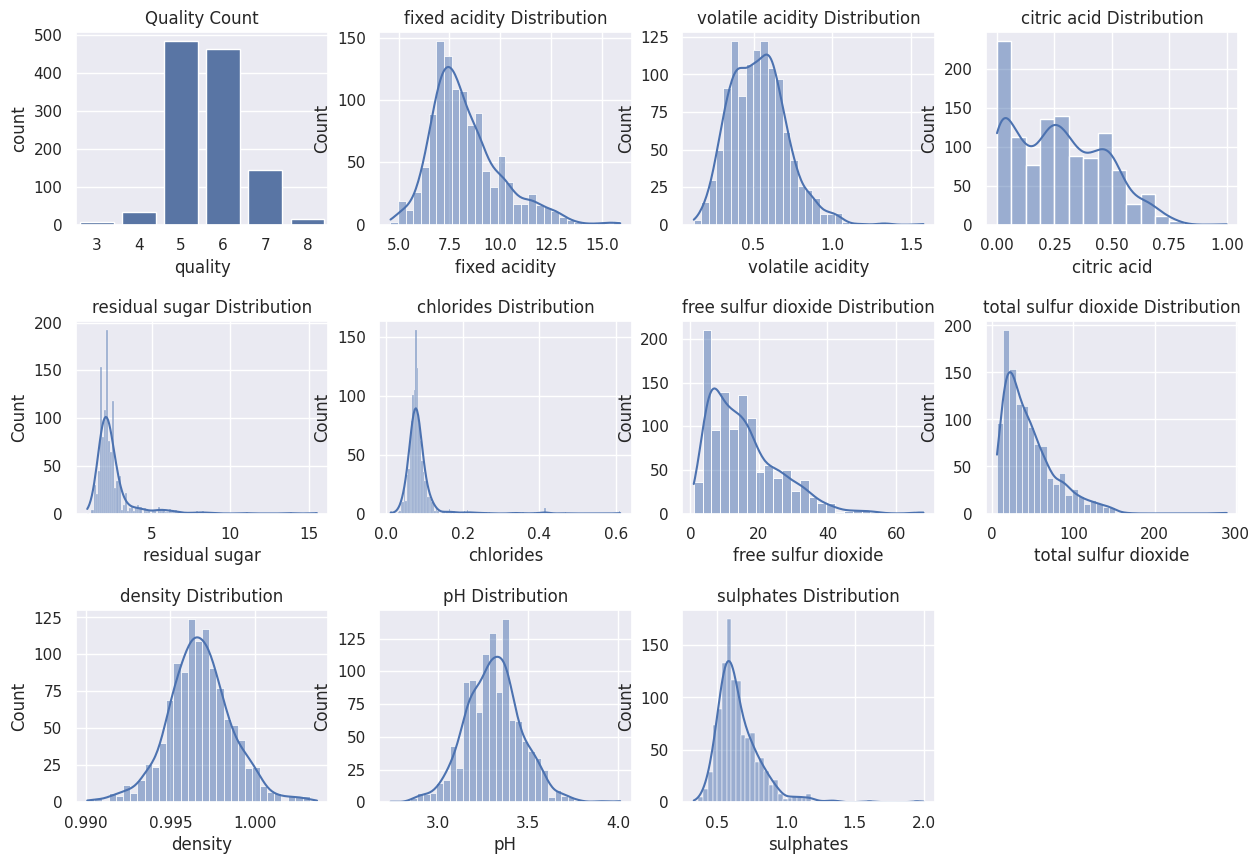

In [ ]:
#setting the plot style
sbs.set(style="darkgrid")

#list of columns to plot
columns_to_plot = ['quality','fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

#initialize the matplotlib figure
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)

#flatten the axes array for easire iteration
axes = axes.flatten()

#generate countplot for quality (categorical)
sbs.countplot(x='quality', data=wq, ax=axes[0])
axes[0].set_title('Quality Count')

#generate histograms for the continuous variables
for i, column in enumerate(columns_to_plot[1:], start=1):
    sbs.histplot(x=column, data=wq, ax=axes[i], kde=True)
    axes[i].set_title(f'{column} Distribution')

#remove the last empty subpot
fig.delaxes(axes[-1])

<ipython-input-16-85000d1a9012>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbs.distplot(wq['alcohol'])


<Axes: xlabel='alcohol', ylabel='Density'>

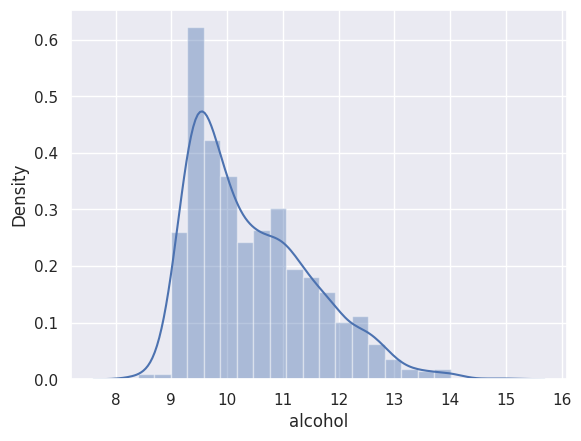

In [ ]:
sbs.distplot(wq['alcohol'])

In [ ]:
wq.hist(figsize=(10,10),bins=50)
plt.show()

In [ ]:
corr = wq.corr()
fig, ax = plt.subplots(figsize=(12, 10))
sbs.heatmap(corr, annot=True, cmap='coolwarm')
plt.tight_layout()
plt.show()

In [ ]:
sbs.pairplot(wq, hue='quality')
plt.show()

In [ ]:
sbs.violinplot(x='quality', y='alcohol', data=wq)
plt.show()

Performing Feature Selection

In [ ]:
from re import X
#Create Classification version of target variable
wq['goodquality'] = [1 if x >= 7 else 0 for x in wq['quality']] #separates feature variables and target variables
x = wq.drop(['quality','goodquality'], axis=1)
y = wq['goodquality']

In [ ]:
print(x)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  

In [ ]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1138    0
1139    0
1140    0
1141    0
1142    0
Name: goodquality, Length: 1143, dtype: int64


In [ ]:
#See proportion of good vs bad wines
wq['goodquality'].value_counts()

goodquality
0    984
1    159
Name: count, dtype: int64

Feature Importance

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

from sklearn.ensemble import ExtraTreesClassifier
classifiern = ExtraTreesClassifier()
classifiern.fit(x,y)
score = classifiern.feature_importances_
print(score)

[0.07262709 0.09626073 0.10152783 0.06745032 0.06427017 0.06061623
 0.0754146  0.08330189 0.06376373 0.10083931 0.14726516 0.06666293]


From this we can see that, **Alcohol** and **Citric Acid** are of high importance with a significant value between *0.10-0.15*.

Chlorides and Free Sulfur Dioxide with value between *0.6-0.7* have least importance and rest others have a medium importance with values between *0.7-0.10*

Splitting our dataset into train and test

In [ ]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

Performing Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score,confusion_matrix
log_accuracy = accuracy_score(y_test, y_pred)
print('Logistic Regression Accuracy: ',(log_accuracy))

Logistic Regression Accuracy:  0.8892128279883382


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The output value **0.8892**, indicates that the **Logistic Regression model** has achieved an accuracy of **88.92%** on the test data which means the model correctly predicted the labels for **88.92%** of the unseen data points.

In [ ]:
confusion_matrix(y_test, y_pred)

array([[193,   5],
       [ 22,   9]])

Performing K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score,confusion_matrix
knn_accuracy = accuracy_score(y_test, y_pred)
print('KNN Accuracy: ',(knn_accuracy))

KNN Accuracy:  0.8134110787172012


The output value **0.8134**, indicates that the **KNN model** has achieved an accuracy of **81.34%** on the test data which means the model correctly predicted the labels for **81.34%** of the unseen data points.

Comparing with the **Logistic Regression Model (88.92%)** ran above, it is less optimal.

Performing Support Vector Machines (SVC)

In [ ]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score
svc_accuracy = accuracy_score(y_test, y_pred)
print('SVC Accuracy: ',(svc_accuracy))

SVC Accuracy:  0.8646288209606987


The output value **0.8646**, indicates that the **SVM model** has achieved an accuracy of **86.46%** on the test data.

Comparing with the **Logistic Regression Model (88.92%)** ran above, it is less optimal but is more optimal than **KNN Model (81.34%)**.

Performing Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy',random_state=7)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score
dt_accuracy = accuracy_score(y_test, y_pred)
print('Decision Tree Accuracy: ',(dt_accuracy))

Decision Tree Accuracy:  0.8833819241982507


The output value **0.8834**, indicates that the **Decision Tree model** has achieved an accuracy of **88.34%** on the test data.

Comparing with the **Logistic Regression Model** **(88.92%)** ran above, it is less optimal but is more optimal than KNN Model ** **bold text**(81.34%)** and SVM Model **(86.46%)**.

Using Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score
gnb_accuracy = accuracy_score(y_test, y_pred)
print('Gaussian Naive Bayes Accuracy: ',(gnb_accuracy))

Gaussian Naive Bayes Accuracy:  0.8396501457725948


The output value **0.8396**, indicates that the **GNB model** has achieved an accuracy of **83.96%** on the test data.

Comparing with the Logistic Regression Model **(88.92%)** , **SVM Model** **(86.46%)** and** Decision Tree Model** **(88.34%)** ran above, it is less optimal but is more optimal than KNN Model ** **bold text**(81.34%)**.

Performing Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score
rf_accuracy = accuracy_score(y_test, y_pred)
print('Random Forest Accuracy: ',(rf_accuracy))

Random Forest Accuracy:  0.9125364431486881


The output value **0.9125**, indicates that the **Random Forest model** has achieved an accuracy of **91.25%** on the test data.

Comparing with the **Logistic Regression Model (88.92%)**, **SVM Model (86.46%)**, **Decision Tree Model (88.34%)**, **KNN Model (81.34%)** and **GNB Model (83.96%)** ran above, it is the most optimal.

In [ ]:
accuracies = {
    'Logistic Regression': log_accuracy,
    'K-Nearest Neighbors': knn_accuracy,
    'Support Vector Machine': svc_accuracy,
    'Decision Tree': dt_accuracy,
    'Gaussian Naive Bayes': gnb_accuracy,
    'Random Forest': rf_accuracy
}

result_df = pd.DataFrame(list(accuracies.items()), columns=['Model', 'Accuracy'])
print(result_df.sort_values(by='Accuracy', ascending=False))

best_model = max(accuracies, key=accuracies.get)
print(f'The best model is {best_model} with an accuracy of {accuracies[best_model]}.')

                    Model  Accuracy
5           Random Forest  0.912536
0     Logistic Regression  0.889213
3           Decision Tree  0.883382
2  Support Vector Machine  0.864629
4    Gaussian Naive Bayes  0.839650
1     K-Nearest Neighbors  0.813411
The best model is Random Forest with an accuracy of 0.9125364431486881.


Making Predictions and Comparing the Actual and Predicted Data
Also Mean Absolute Error

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, mean_absolute_error

y_pred = model.predict(x_test)
rf_accuracy = accuracy_score(y_test, y_pred)
print('Random Forest Accuracy: ',(rf_accuracy))

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error: ',(mae))

Random Forest Accuracy:  0.9125364431486881
Mean Absolute Error:  0.08746355685131195


Mean Absolute Error measures the average absolute difference between the predicted and actual values.

Here, the average difference between the predicted and actual values is 0.0875, which implies that the model's predictions are relatively close to the true values.